# <u>hospitality-data-insights-and-cancellation-prediction</u>

[GitHub Link](https://github.com/ajitmane36/hospitality-data-insights-and-cancellation-prediction-model.git) 

#### Problem Statement

- Analyse the data to find trends, customer behaviour, and factors influencing cancellation for the hospitality industry. The goal is to build a predictive model that forecasts cancellations and provides insight into a given dataset.

In [6]:
# Import dependancies
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

#### Dataset

In [8]:
# Load dataset
df=pd.read_csv(r"C:\Users\ajitm\Data Science Cources\Deep Learning Projects\hospitality-data-insights-and-cancellation-prediction-model\hotel_bookings.csv")
pd.set_option('display.max_columns', None)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
# shape
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset has 119390 rows and 32 columns.


In [10]:
# Columns
print(f'Column names: {df.columns}')
print(f"{'--'*50} \n Dataset has {len(df.columns)} columns")

Column names: Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')
---------------------------------------------------------------------------------------------------- 
 Dataset has 32 columns


In [11]:
# Dataset basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

- Feature children, country, agent and company has nulls.

In [13]:
# Duplicates
print(f"Dataset has {df.duplicated().sum()} duplicates.")
# remove duplicates
df.drop_duplicates(inplace=True)
print(f"{'--'*50} \n SHape of dataset after prforming drop duplicates: {df.shape}")

Dataset has 31994 duplicates.
---------------------------------------------------------------------------------------------------- 
 SHape of dataset after prforming drop duplicates: (87396, 32)


In [14]:
# Handle nulls
null_df=pd.DataFrame({'column':df.columns, 'null_count':df.isna().sum(), '%_null':round(((df.isna().sum()/len(df))*100),4)}).set_index('column')
null_df

,null_count,%_null
column,,
hotel,0,0.0000
is_canceled,0,0.0000
lead_time,0,0.0000
arrival_date_year,0,0.0000
arrival_date_month,0,0.0000
arrival_date_week_number,0,0.0000
arrival_date_day_of_month,0,0.0000
stays_in_weekend_nights,0,0.0000
stays_in_week_nights,0,0.0000


- Feature children, country, agent and company has nulls.

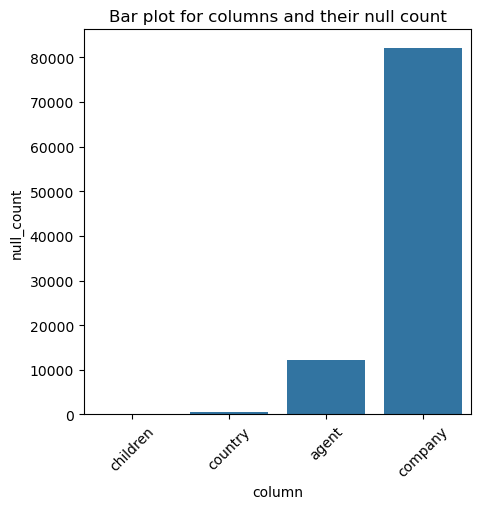

In [16]:
# Visualize Nulls
plt.figure(figsize=(5,5))
ax = sns.barplot(x='column', y='null_count', data=null_df[null_df['null_count'] > 0])
ax.set_title('Bar plot for columns and their null count')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Identify columns with null values
null_clo = df.columns[df.isnull().any()].tolist()

for col in null_clo:
    print(f"{'--'*50} \n {df[col].value_counts()}")

---------------------------------------------------------------------------------------------------- 
 children
0.0     79028
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: count, dtype: int64
---------------------------------------------------------------------------------------------------- 
 country
PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: count, Length: 177, dtype: int64
---------------------------------------------------------------------------------------------------- 
 agent
9.0      28759
240.0    13028
14.0      3349
7.0       3300
250.0     2779
         ...  
497.0        1
337.0        1
510.0        1
165.0        1
449.0        1
Name: count, Length: 333, dtype: int64
---------------------------------------------------------------------------------------------------- 
 company
40.0     851
223.0    503
45.0     238
153.0    206
154.0    133
        ..

In [18]:
## Replace nulls

# company feature have 93% null so remove this column
df.drop(columns='company', inplace=True)
# Replce children, country and agent feature with its mode
for col in ['children', 'country','agent']:
    df.fillna(df[col].mode()[0], inplace=True)

In [19]:
# Verify nulls
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [35]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [37]:
# Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

- Features 'children' and 'agent' are in float type, convert them to apropriate data type int.
- Feature 'reservation_status_date' is in object format, nned to convert to date format.

#### Feature Engineering

In [40]:
## Assigning appropriate data type to featuresa
df[['children','agent']]=df[['children','agent']].astype('int64')
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'], format='%Y-%m-%d')

In [44]:
# verifing chenges
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  int64         
 11  babies

In [64]:
# Creating new meaningfull feature
df['total_stays']=df.stays_in_week_nights+df.stays_in_week_nights
df['total_people']=df.adults+df.babies+df.children
df['total_childrens']=df.children+df.babies
df['reserved_room_assigned']=np.where(df.reserved_room_type==df.assigned_room_type, 'yes', 'no')
df['guest_category']=np.where(df.total_people==1, 'single', np.where(df.total_people==2, 'couple', 'family'))
df['lead_time_category']=np.where(df.lead_time<=30, 'low', np.where((df.lead_time>=31) & (df.lead_time<=90), 'medium', 'high'))

# Drop unnecessary features after new features created
df.drop(columns=['stays_in_week_nights','stays_in_week_nights','adults','children','babies','reserved_room_type', 'assigned_room_type', 'total_people', 'lead_time'], inplace=True, axis=1)

In [72]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   arrival_date_year               87396 non-null  int64         
 3   arrival_date_month              87396 non-null  object        
 4   arrival_date_week_number        87396 non-null  int64         
 5   arrival_date_day_of_month       87396 non-null  int64         
 6   stays_in_weekend_nights         87396 non-null  int64         
 7   meal                            87396 non-null  object        
 8   country                         87396 non-null  object        
 9   market_segment                  87396 non-null  object        
 10  distribution_channel            87396 non-null  object        
 11  is_rep

In [74]:
df.head()

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays,total_childrens,reserved_room_assigned,guest_category,lead_time_category
0,Resort Hotel,0,2015,July,27,1,0,BB,PRT,Direct,Direct,0,0,0,3,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0,yes,couple,high
1,Resort Hotel,0,2015,July,27,1,0,BB,PRT,Direct,Direct,0,0,0,4,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0,yes,couple,high
2,Resort Hotel,0,2015,July,27,1,0,BB,GBR,Direct,Direct,0,0,0,0,No Deposit,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2,0,no,single,low
3,Resort Hotel,0,2015,July,27,1,0,BB,GBR,Corporate,Corporate,0,0,0,0,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02,2,0,yes,single,low
4,Resort Hotel,0,2015,July,27,1,0,BB,GBR,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03,4,0,yes,couple,low


#### EDA

In [84]:
# Obtaining target variables
excluded_var=[var for var in df.columns if len(df[var].value_counts())>15]
included_var=[var for var in df.columns if var not in excluded_var]
print(f"Excluded variable: {excluded_var} \n {'--'*50} \n Included Variables {included_var}")

Excluded variable: ['arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'country', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'reservation_status_date', 'total_stays'] 
 ---------------------------------------------------------------------------------------------------- 
 Included Variables ['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'deposit_type', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'total_childrens', 'reserved_room_assigned', 'guest_category', 'lead_time_category']


In [102]:
# Defining r to autofit the number and size of plots
r = int(len(included_var) / 3 + 1)

# Defining a function to annotate the percent count of each value
def annot_percent(ax):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in ax.patches:
        total = sum([p.get_height() for p in ax.patches]) 
        percent = round((p.get_height() / total) * 100, 2) 
        x = p.get_x() + p.get_width() / 2 
        y = p.get_height()
        ax.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

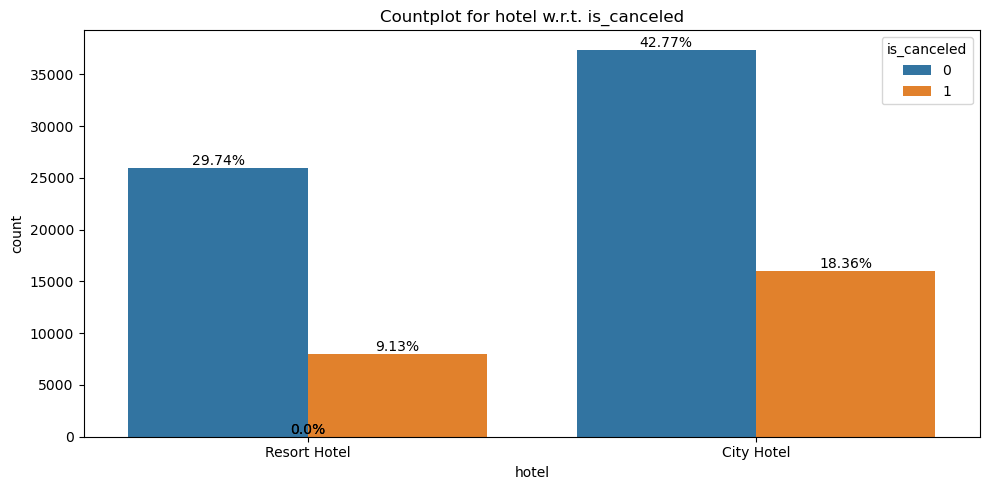

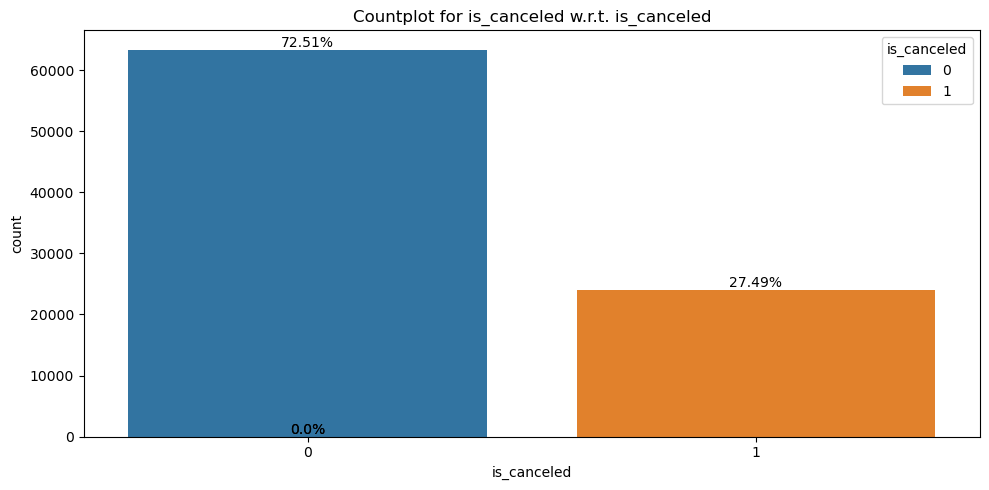

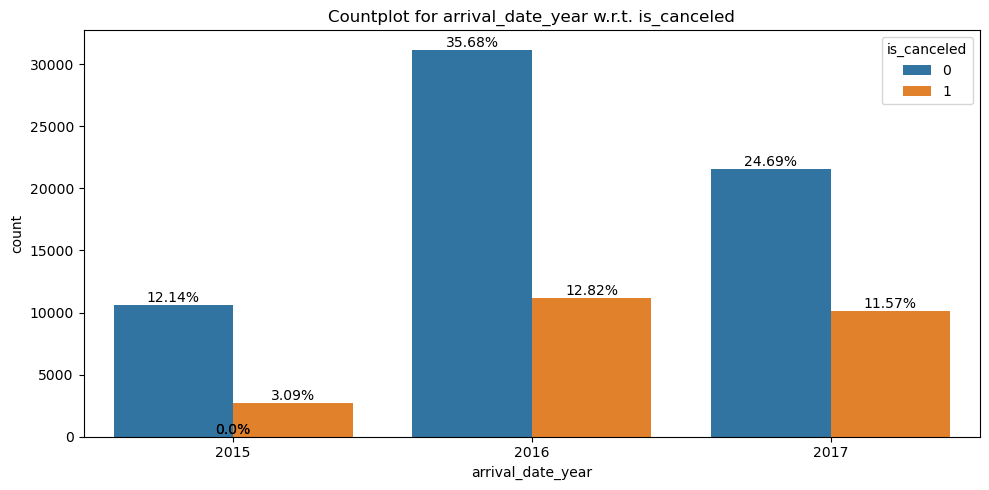

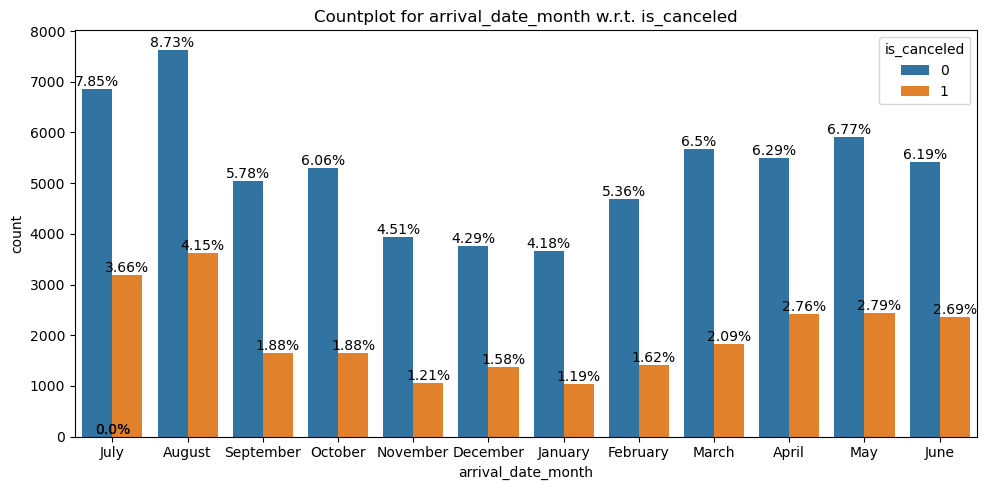

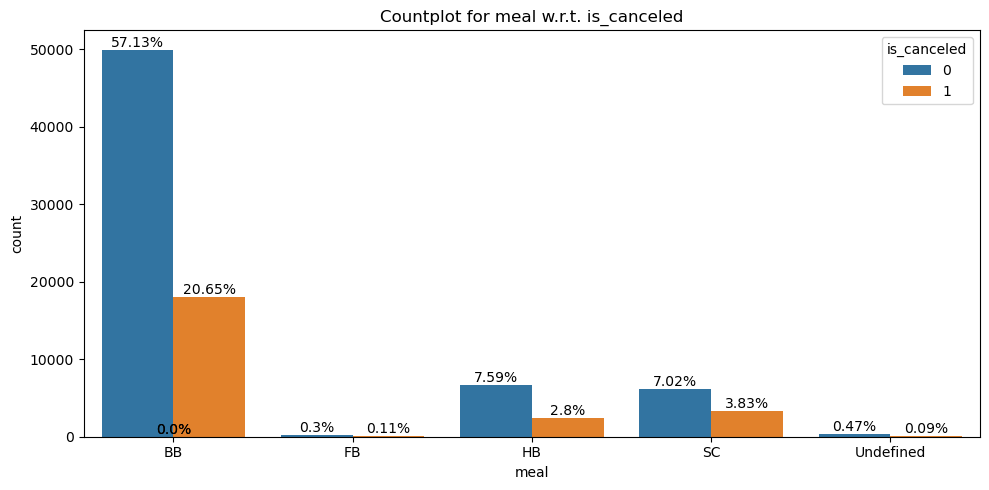

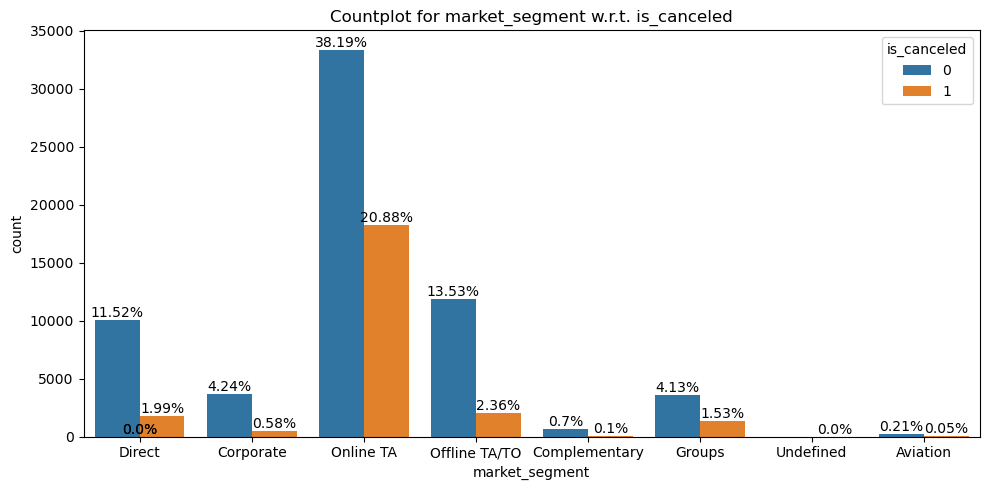

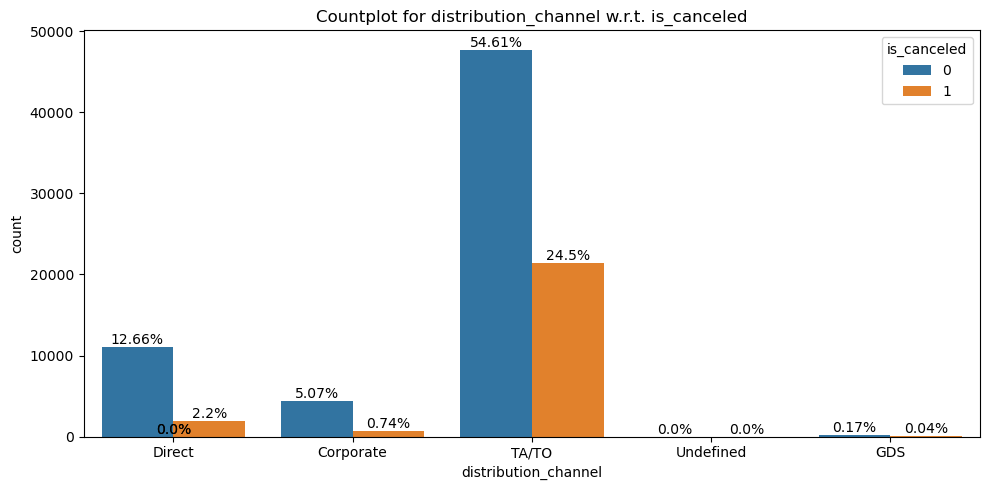

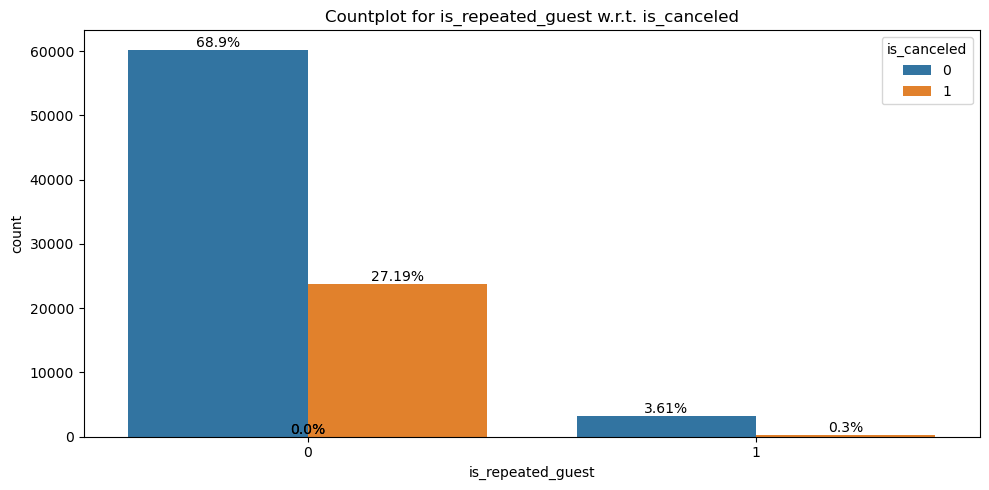

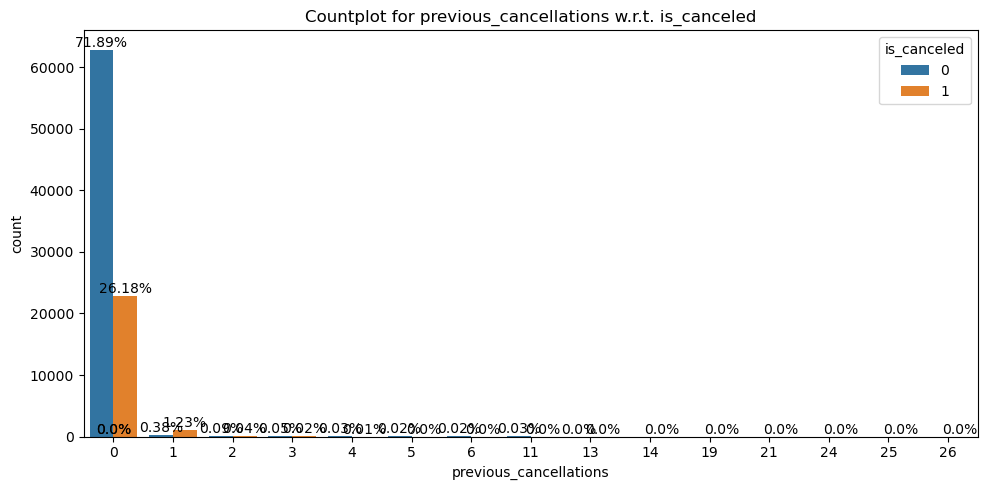

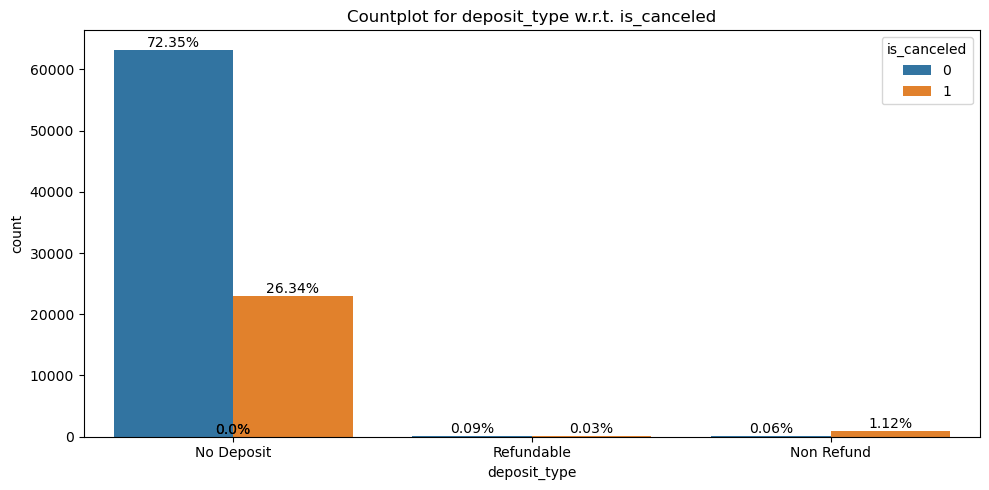

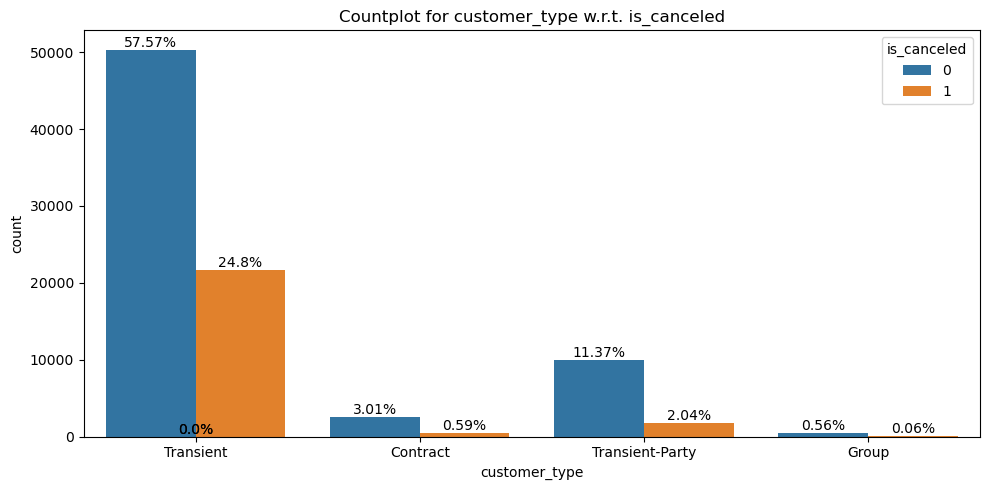

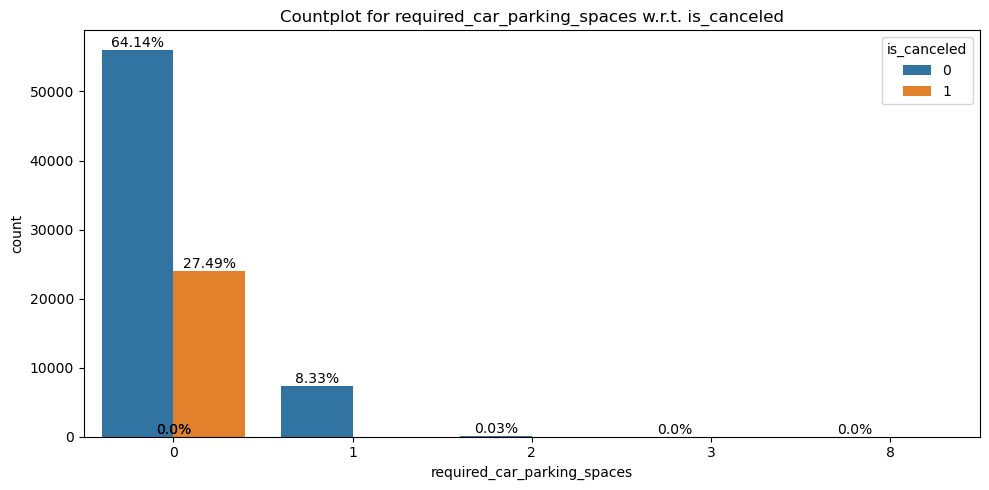

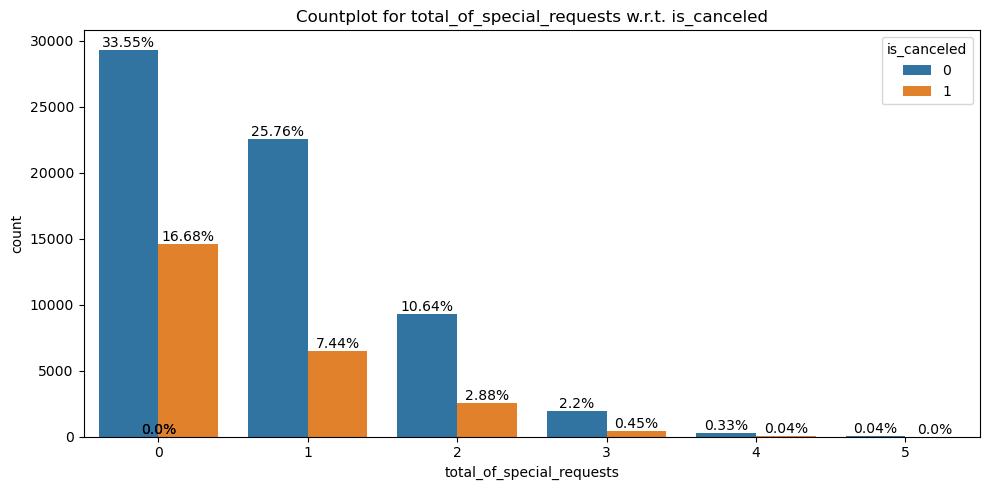

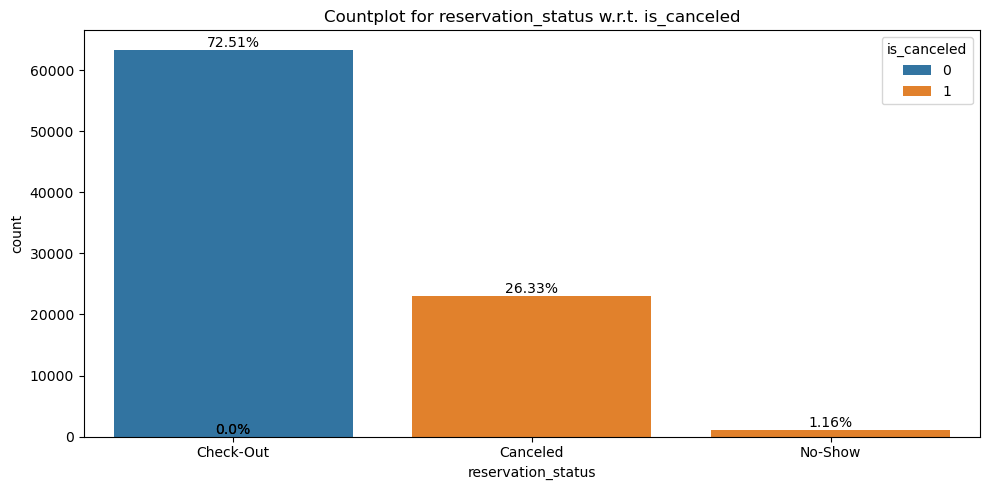

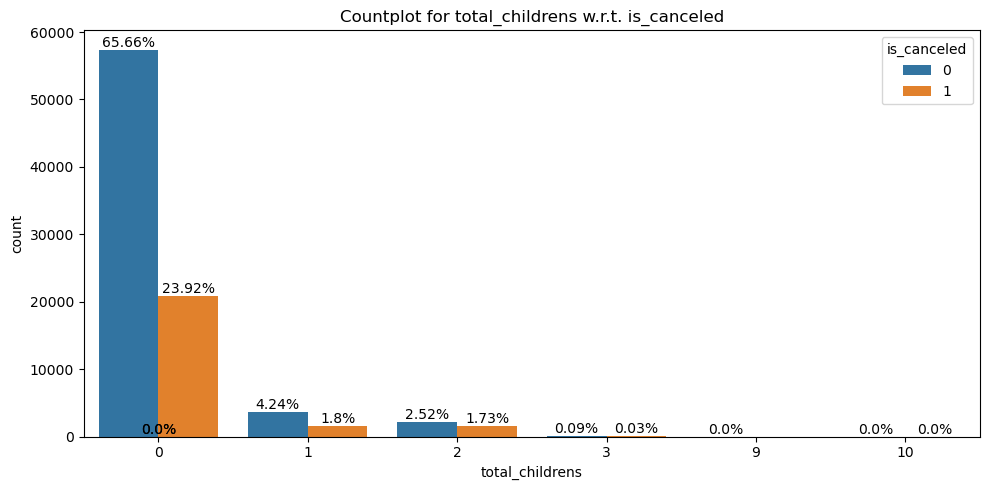

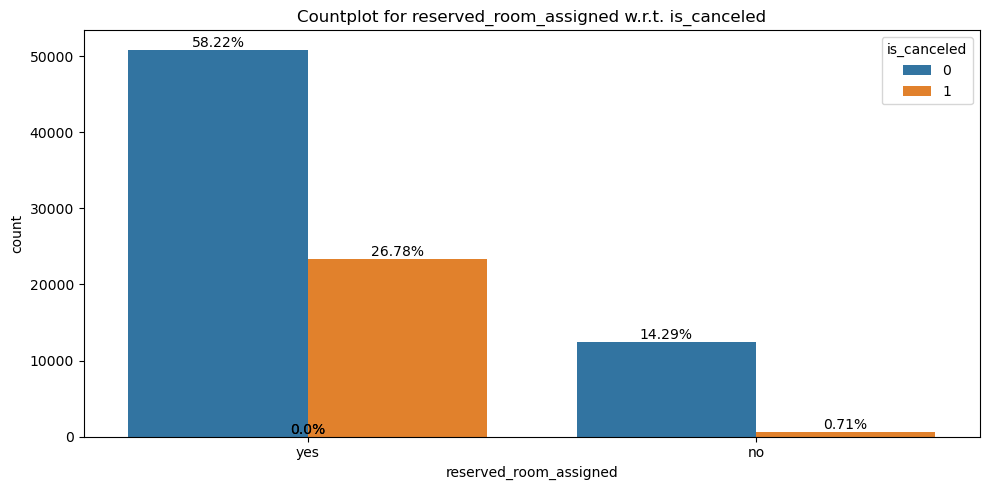

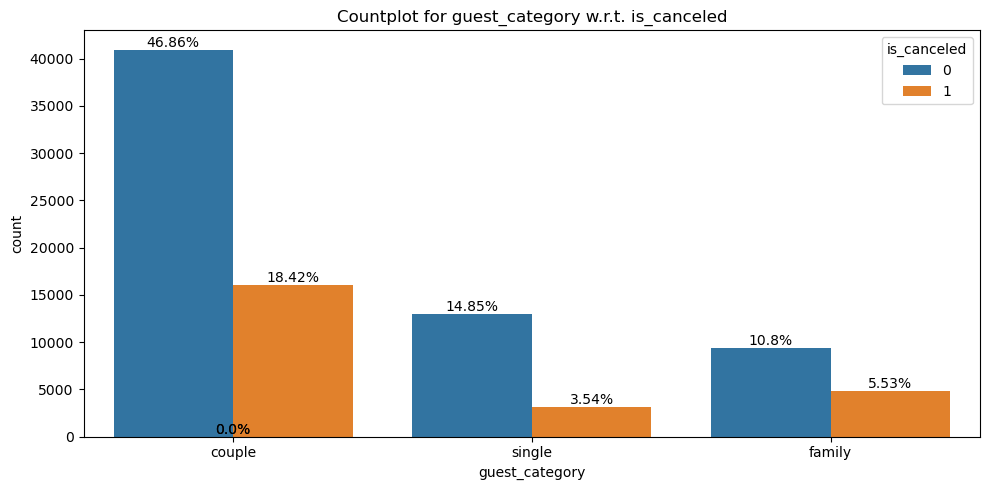

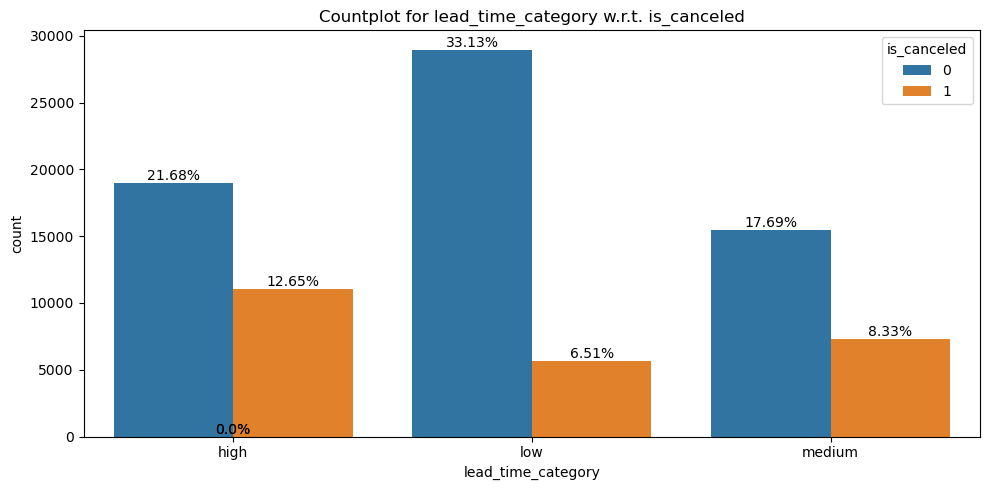

In [104]:
# Plotting countplots with respect to is_canceled and other variables
r = len(included_var)

for i, var in enumerate(included_var):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5)) 
    sns.countplot(x=df[var], hue='is_canceled', data=df, ax=ax)
    ax.set_title(f"Countplot for {var} w.r.t. is_canceled")
    annot_percent(ax)
    plt.tight_layout()
    plt.show()

- Observations:
    - Most of the customers booked City hotel than resort but city hotels has double cancellation rate than that of resort.
    - 27.49% which is almost 1/4 of customers who cancelled their booking.
    - In 2016 most of bookings were made by customers and number of bookings reduced by 12.24% in 2017 with constant cansallation rate.
    -Fromn April to August booking cancellation increase gradually with August is top with 4.15%. In November, December, January less number of booking were made by customers which is nearly 6%.
    We can give offer in this 3 month for increasing revenue in this 3 month.
    - "BB" type meal is all time favourite amonth all types of meal followed by 'SC' and 'HB', 'BB' meal is most ordered by customers amoung all.
    - 'FB' is very less number of time ordered food by customers.
    - Most booking were made through Online market segment followed by Offline TA/TO. Booking made though Aviation merket segament is less probability of booking cancellation followed by Corporate.
    - There is less probabilty that customer revisit. Only 3.91% customers were visited again.
    - Customer who previously cancelled booking are more chance they will cancel booking.
    - Customer intrested in booking with no deposite.
    - Transient type customers were made most number of booking followed by Transient-Party. We can offer booking made for group for generate more revenue through this type customers cause group type customers are lee in numbers who made booking.
    - Most of the customers not required space for parking but generally 1 is sufficient space for parking.
    - Customer can made 1 to 2 special request in booking period but most of the cutomers not asked for any special request.
    - Most of the customers are visit without childrens, can be change by taking several steps to boost visits of customers with childrens.
    - Reserved room not assigned is not reseaon of cancellation of bookings.
    - Most of the booking cancelled by customes who have assigned reserved room.
    - Most booking were made by couples followed by single people. Need to boost booking for family and single people.
    - More than 90 days prebooking has around 50% changes that booking will cancel. Most of the prebookings made for 1 month before.